Jeg har valgt å løse den ferdigdefinerte oppgaven som er gitt.

Forutsetning for oppgaven er at du har filen support_uke_24.xlsx i samme mappe som denne notebooken.

I flere av oppgavene gjentar jeg samme prosess. Der har jeg valgt å ikke kommentere like grundig på de påfølgende stedene, 
men henviser til kommentarene ovenfor. I et virkelig program ville jeg kanskje vært mer forsiktig med det, da de ikke nødvendigvis
skal leses/brukes i rekkefølge, men i denne oppgaven forutsetter jeg at den leses i rekkefølge, og da blir det mindre 
repitisjon og kanskje litt enklere å gjennomgå. 
Jeg forutsetter at man kjører deloppgavene i rekkefølge. I enkelte deloppgaver har jeg lest inn filen hver gang, i andre regner jeg med at du har kjørt dette i rekkefølge, og dermed lest inn filen tidligere. I et program som skal brukes, og man ikke hvet hvilke andre ting som er kjørt før, bør man nok hente inn dette hver gang, men for denne oppgaven gjorde jeg det sånn. 

Del a) Skriv et program som leser inn filen ‘support_uke_24.xlsx’ og lagrer data fra kolonne 1
i en array med variablenavn ‘u_dag’, dataen i kolonne 2 lagres i arrayen ‘kl_slett’, data i
kolonne 3 lagres i arrayen ‘varighet’ og dataen i kolonne 4 lagres i arrayen ‘score’
. Merk:
filen ‘support_uke_24.xlsx’ må ligge i samme mappe som Python-programmet ditt.

In [108]:
import pandas as pd # Jeg henter Pandas for kunne hente fra filen senere

# Lager en variabel for filnavnet, slik at jeg kan bruke det senere (ikke nødvendig)
file_path = 'support_uke_24.xlsx'

# Bruker Pandas-funksjonen read_excel for å hente filen
df = pd.read_excel(file_path) # Her kunne jeg evt ha skrevet inn filnavnet direkte

# Lagre dataene i separate arrays
u_dag = df.iloc[:, 0].tolist()  # Kolonne 1 legges i arrayen u_dag
kl_slett = df.iloc[:, 1].tolist()  # Kolonne 2 legges i arrayen kl_slett
varighet = df.iloc[:, 2].tolist()  # Kolonne 3 legges i arrayen varighet
score = df.iloc[:, 3].tolist()  # Kolonne 4 legges i arrayen score

# Test av kode hittil - ikke del av besvarelse - kommenteres ut ved innlevering
# antall_test = 3 # lager en variabel for hvor mange linjer fra filen som skal skrives ut i testen
# print("u_dag:", u_dag[:antall_test])  # Skriv ut de første verdiene fra u_dag
# print("kl_slett:", kl_slett[:antall_test])  # Skriv ut de første verdiene fra kl_slett
# print("varighet:", varighet[:antall_test])  # Skriv ut de første verdiene fra varighet
# print("score:", score[:antall_test])  # Skriv ut de første verdiene fra score
print("Denne deloppgaven skriver ikke noe resultat (bare denne infoteksten) til skjerm - den leser bare inn fra fil")

Denne deloppgaven skriver ikke noe resultat (bare denne infoteksten) til skjerm - den leser bare inn fra fil


Del b) Skriv et program som finner antall henvendelser for hver de 5 ukedagene. Resultatet
visualiseres ved bruk av et søylediagram (stolpediagram).

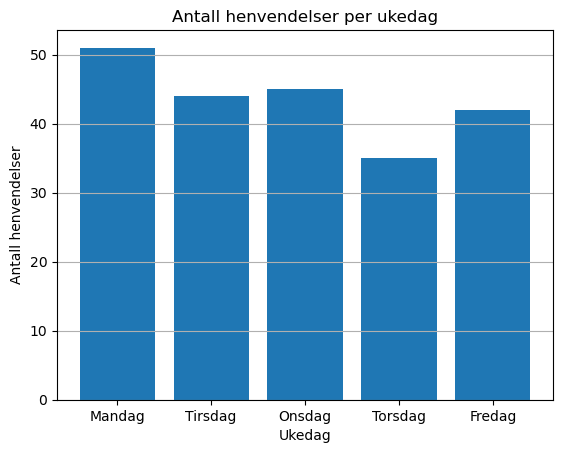

In [104]:
import matplotlib.pyplot as plt # Jeg henter inn matplotlib.pyplot for å kunne benytte det senere til grafikken
from collections import Counter # Jeg henter inn Counter som er en funksjon for å telle for å kunne bruke denne senere

# Lager en variabel som består av hvor mange registreringer som er per ukedag
ukedag_telling = Counter(u_dag)
# Counter er ikke gjennomgått i studiet, men jeg fant den ved egenstudie
# Alternativt kunne jeg laget variabler, kjørt en sløyfe gjennom hele listen, og lagt til hver gang jeg fant en mandagshenvendelse etc

# Regnearket vi fikk er allerede sortert, så alle mandagsregistreringene kommer først, så alle tirsdagstelefonene
# Dersom disse ikke allerede var i rekkefølge, kan det hende jeg måtte sortert dem, men det slapp jeg

# Lager en liste for ukedager, og en for antall telefonsamtaler
ukedager = list(ukedag_telling.keys())
antall = list(ukedag_telling.values())

# Bruker matplotlib til å tegne opp et søylediagram med telefoner per dag
plt.bar(ukedager, antall) # Setter aksene
plt.title('Antall henvendelser per ukedag') # Overskrift på diagrammet
plt.xlabel('Ukedag') # Hva som skal stå på X-aksen
plt.ylabel('Antall henvendelser') # Hva som skal stå på Y-aksen
plt.grid(axis='y') # Lager horisontale linjer, for å gjøre søylen litt enklere å lese (ikke nødvendig)



Del c) Skriv et program som finner minste og lengste samtaletid som er loggført for uke 24.
Svaret skrives til skjerm med informativ tekst.

In [8]:
from datetime import datetime # Importerer datetime for å kunne gjøre om formatet senere

# Funksjon for å konvertere tid (hh:mm:ss) til sekunder
# Dette var nødvendig, fordi jeg fikk ValueError 
# fordi Python prøvde å konvertere en tidsstreng (for eksempel '00:07:12') til et flyttall (float)

def tid_til_sekunder(tid_str):
    tid = datetime.strptime(tid_str, "%H:%M:%S")  # Konverterer tid til datetime-objekt
    return tid.hour * 3600 + tid.minute * 60 + tid.second  # Konverterer til sekunder

# Lager en variabel for korteste samtale 
# Lager en variabel for lengste samtale
min_varighet = float('inf') #(setter den til en uendelig stor verdi, så alle andre verdier må være mindre)
max_varighet = float('-inf') #(setter den til en uendelig lav verdi, så alle andre verdier må være større)

# I denne oppgaven ville jeg normalt bruke min- og max- funksjon, men jeg velger å løse den vha
# en while-løkke, for å vise at jeg behersker det (som gjennomgått i forelesningene).  
# Valgte while-løkke fordi jeg i teorien ikke vet antall linjer
index = 0 # Setter telleren til 0
while index < len(varighet): # Kjør så lenge variabelen index er mindre enn lengden på listen varighet
    tid = varighet[index] 
    sekunder = tid_til_sekunder(tid)  # Konverterer tid til sekunder og setter variabelen sekunder
    
    if sekunder < min_varighet: # Dersom sekunder er mindre enn den laveste verdien, kjøres neste linje (hvis ikke hopp videre)
        min_varighet = sekunder # Sett min_varighet til verdien på sekunder
    
    if sekunder > max_varighet: # Dersom sekunder er større enn den høyeste, kjøres neste linje (hvis ikke hopp videre)
        max_varighet = sekunder # Sett max_varighet til verdien på sekunder
    
    index += 1  # Øker index for å gå videre til neste element

# Nå må jeg konvertere tilbake et mer leselig tidsformat (jeg har nå min og maks-verdiene i sekunder) 
# Lager 3 variabler for korteste samtale i timer, minutter og sekunder
min_timer = min_varighet // 3600 # Bruker heltallsdivisjon for å finne hvor mange timer den korteste samtalen er på (1 time = 3600sek)
min_minutter = (min_varighet % 3600) // 60 # Bruker heltallsdivisjon for å finne hvor mange minutter den korteste samtalen er på ( 1 min = 60sek)
min_sekunder = min_varighet % 60 # Bruker modulusoperator for å vise hvor mange sekunder vi sitter igjen med etter operasjonene ovenfor

# Bruker nå samme fremgangsmåte som over, men for lengste samtale (3 nye variabler)
max_timer = max_varighet // 3600 
max_minutter = (max_varighet % 3600) // 60
max_sekunder = max_varighet % 60

# Skriv ut resultatene i 'hh:mm:ss' format
print(f"Minste samtaletid var {min_timer:02}:{min_minutter:02}:{min_sekunder:02} minutter.")
print(f"Lengste samtaletid var {max_timer:02}:{max_minutter:02}:{max_sekunder:02} minutter.")


Minste samtaletid var 00:00:59 minutter.
Lengste samtaletid var 00:11:28 minutter.


In [10]:
# Alternativ løsning på oppgave c) vha funksjonene min() og max()
# Lager to variabler for lengste og korteste samtaletid
min_varighet = min(varighet)
max_varighet = max(varighet)

# Det var ikke del av oppgavene å si hvilken dag det var på, men likevel...
min_index = varighet.index(min_varighet)
max_index = varighet.index(max_varighet)

min_dag = u_dag[min_index]
max_dag = u_dag[max_index]

# Skriv ut resultatene med informativ tekst. 
print(f"Minste samtaletid var {min_varighet} minutter på {min_dag}.")
print(f"Lengste samtaletid var {max_varighet} minutter på {max_dag}.")


Minste samtaletid var 00:00:59 minutter på Tirsdag.
Lengste samtaletid var 00:11:28 minutter på Fredag.


In [72]:
from datetime import datetime  # Importerer datetime for å kunne gjøre om formatet senere

# Funksjon for å konvertere tid (hh:mm:ss) til sekunder (samme begrunnelse som i deloppgave c))
def tid_til_sekunder(tid_str):
    tid = datetime.strptime(tid_str, "%H:%M:%S")  # Konverterer tid til datetime-objekt
    return tid.hour * 3600 + tid.minute * 60 + tid.second  # Konverterer til sekunder

# Lager en variabel for total samtaletid, og setter den initielt til 0 
total_samtaletid = 0

# Går gjennom alle samtalene og legger sammen samtaletidene for å få total samtaletid
for tid in varighet: # Her bruker jeg en for-løkke. Kunne også valgt while-løkke, men her ble det ryddigere med for...
    total_samtaletid += tid_til_sekunder(tid) #legger tiden på linjen til total_samtaletid

# Beregner gjennomsnittlig samtaletid i sekunder
gjennomsnittlig_tid = total_samtaletid / len(varighet) # Her deler jeg totaltiden på len(varighet) som er antall linjer i listen varighet.

# Konverterer gjennomsnittlig tid til timer, minutter og sekunder (samme fremgangsmåte som i deloppgave c))
gjennomsnitt_timer = int(gjennomsnittlig_tid // 3600)
gjennomsnitt_minutter = int((gjennomsnittlig_tid % 3600) // 60)
gjennomsnitt_sekunder = int(gjennomsnittlig_tid % 60)

# Skriv ut resultatet i 'hh:mm:ss' format
print(f"Gjennomsnittlig samtaletid er {gjennomsnitt_timer:02}:{gjennomsnitt_minutter:02}:{gjennomsnitt_sekunder:02}.")


Gjennomsnittlig samtaletid er 00:06:40.


In [ ]:
Del e) Supportvaktene i MORSE er delt inn i 2-timers bolker: kl 08-10, kl 10-12, kl 12-14 og kl
14-16. Skriv et program som finner det totale antall henvendelser supportavdelingen mottok
for hver av tidsrommene 08-10, 10-12, 12-14 og 14-16 for uke 24. Resultatet visualiseres ved
bruk av et sektordiagram (kakediagram).

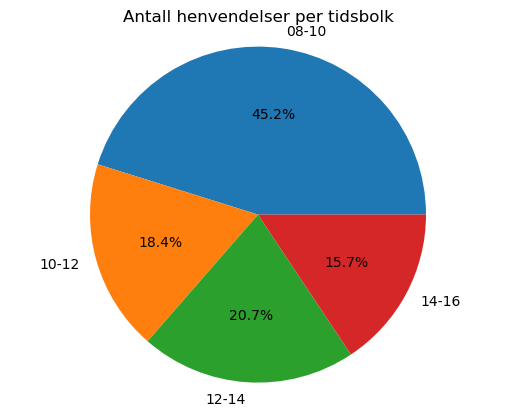

In [74]:
import pandas as pd # Henter inn pandas for å kunne lese og jobbe med Excel-filen
import matplotlib.pyplot as plt #  Henter inn matplotlib for å kunne lage grafikk etterpå

# Leser inn Excel-filen
filnavn = 'support_uke_24.xlsx' # Dette er ikke nødvendig om du har kjørt alle kodene ovenfor, men gjør ingen skade...
df = pd.read_excel(filnavn,) # Henter filen. Denne fjerner automatisk første linje som er overskrift. 
# Evt kan man bruke header=none, så vil den ta med øverste linje også, men da må jeg fjerne den etterpå...

# Henter ut klokkeslett-kolonnen (index 1) og konverterer til datetime med korrekt format
klokkeslett_str = df['Klokkeslett'].astype(str) # Kan ta ut hele, fordi jeg fjernet øverste linje ovenfor
klokkeslett = pd.to_datetime(klokkeslett_str, format='%H:%M:%S') # Gjør tidspunktet til det formatet jeg ønsker 

# Kode for å sjekke hvordan klokkeslettene ser ut. Denne kommenteres ut før innlevering
# print(klokkeslett_str.head(10))

# Lager en dictionary for tidsbolkene og setter tellerne til 0 på alle
tidsbolker = {
    '08-10': 0, 
    '10-12': 0,
    '12-14': 0,
    '14-16': 0
}

# Går gjennom listen for klokkeslett og teller opp hver gang vi kommer til et klokkeslett som passer med telleren
# Jeg bruker for-løkke, fordi jeg vet lengden på listen jeg skal gjennomgå
for tid in klokkeslett:
    if 8 <= tid.hour < 10:
        tidsbolker['08-10'] += 1 # Hvis tidspunktet tilfredsstiller kravet om å være mellom 8 og 10 telles telleren opp med 1
    elif 10 <= tid.hour < 12:
        tidsbolker['10-12'] += 1 # Hvis tidspunktet tilfredsstiller kravet om å være mellom 10 og 12 telles telleren opp med 1
    elif 12 <= tid.hour < 14:
        tidsbolker['12-14'] += 1 # Hvis tidspunktet tilfredsstiller kravet om å være mellom 12 og 14 telles telleren opp med 1
    elif 14 <= tid.hour < 16:
        tidsbolker['14-16'] += 1 # Hvis tidspunktet tilfredsstiller kravet om å være mellom 14 og 16 telles telleren opp med 1



# Plotter kakediagram
labels = list(tidsbolker.keys()) # Henter navnet (key) fra dictionaryen "tidsbolker"
sizes = [tidsbolker[key] for key in labels] # Lager en liste som heter sizes som inneholder navnet på bolken (key) og telleren (antallet)

plt.pie(sizes, labels=labels, autopct='%1.1f%%') # Printer et paidiagram. sizes er hvilke verdier som skal vises. 
# labels er for å vise bolkene (f.eks. 8-10) utenfor diagrammet, og autpct er for å vise verdien inne i paidiagrammet.
# formatet 1.1 er for å vise hvor mange desimaler man skal ha (1 ville gitt masse desimaler), og til slutt et %-tegn
plt.title('Antall henvendelser per tidsbolk') # Printer overskrift på diagrammet
plt.axis('equal') # Denne sikrer at det blir en sirkel. Det fungerer uten denne linjen, men jeg fikk en ellipse uten den...
plt.show() # Denne har jeg ikke funnet nødvendig, men i cheat sheet sto det at det var lurt å ha den med, for å sikre at 
# diagrammet printes i alle miljøer. I Jupyter Notebook printes det uansett...


Del f) Kundens tilfredshet loggføres som tall fra 1-10 hvor 1 indikerer svært misfornøyd og
10 indikerer svært fornøyd. Disse tilbakemeldingene skal så overføres til NPS-systemet (Net
Promoter Score).
NPS-systemet er konstruert på følgende måte:
Score 1-6 oppfattes som at kunden er negativ (vil trolig ikke anbefale MORSE til andre).
Score 7-8 oppfattes som et nøytralt svar.
Score 9-10 oppfattes som at kunden er positiv (vil trolig anbefale MORSE til andre).
Supportavdelingens NPS beregnes som et tall, prosentandelen positive kunder minus
prosentandelen negative kunder. Ved en formel kan dette gis slik:
NPS = % positive kunder - % negative kunder
Lag et program som regner ut supportavdelings NPS og skriver svaret til skjerm. Merk:
Kunder som ikke har gitt tilbakemelding på tilfredshet, skal utelates fra utregningene.

In [98]:
import pandas as pd # Henter inn pandas for å kunne lese og jobbe med Excel-filen

# Leser inn Excel-filen
filnavn = 'support_uke_24.xlsx' # Dette er ikke nødvendig om du har kjørt alle kodene ovenfor, men gjør ingen skade...
df = pd.read_excel(filnavn)

# Lager en serie med bruker dropna-funksjon fra pandas. Den fjerner alle linjer som er tomme. Kunne evt ha brukt samme metode som i forrige, der jeg laget
# en dictionary, men nå gjør jeg det sånn...
valid_scores = df['Tilfredshet'].dropna() 

# Printer valid_scores for å sjekke hvordan den ser ut. Denne kommenteres ut før innlevering
#print(valid_scores)

# Deler opp i gruppene negative og positive
negative = valid_scores[valid_scores <= 6]  # score 1-6 er negative
positive = valid_scores[valid_scores >= 9]  # score 9-10 er positive

# Printer ut de 2 gruppene. Denne kommenteres ut før innlevering
#print(positive)
#print(negative)

# Beregner hvor mange prosent av de totalt besvarte for de 2 gruppene
total_responses = len(valid_scores)  # Totalt antall svar er lengden på listen valid_scores
negative_percentage = len(negative) / total_responses * 100  # Prosentandel negative er antall negative delt på antall totalt
positive_percentage = len(positive) / total_responses * 100  # Prosentandel positive er antall positive delt på antall totalt

# Beregn NPS slik det står i oppgaven
NPS = positive_percentage - negative_percentage #prosentandel positive minus prosentandel negative

# Skriv ut resultatene
#print(f"Negative kunder: {negative_percentage:.2f}%") # Ikke del av oppgaven - kommenteres ut
#print(f"Positive kunder: {positive_percentage:.2f}%") # Ikke del av oppgaven - kommenteres ut
print(f"NPS (Net Promoter Score) for denne uken er {NPS:.2f}") # Skriver ut tekst og svaret
print("Merk at NPS ikke tar med de som ikke har svart, eller som har svart at de er nøytralt fornøyd")



NPS (Net Promoter Score) for denne uken er 41.86
Merk at NPS ikke tar med de som ikke har svart, eller som har svart at de er nøytralt fornøyd


Kilde til funksjoner
Python cheat sheet: https://gto76.github.io/python-cheatsheet/